In [1]:
import ROOT as r

Welcome to JupyROOT 6.14/09


In [2]:
x = r.RooRealVar("x","x",-10,10)

In [3]:
mean = r.RooRealVar("mean","mean of gaussian",1,-10,10)                                                         
sigma = r.RooRealVar("sigma","width of gaussian",1,0.1,10)                                                      
gauss = r.RooGaussian("gauss","gaussian PDF",x,mean,sigma)                                                      

In [4]:
l = r.RooRealVar("lambda", "slope", -0.1, -5.0, 0.0)                                                            
shape = r.RooExponential("expo", "exponential PDF", x, l)                                                       

In [5]:
nsig = r.RooRealVar("nsig","signal events",20000,0,80000)                                                       
nbkg = r.RooRealVar("nbkg","background events",20000,0,80000)                                                   
                                                                                                                
model = r.RooAddPdf("model","Gauss+shape",r.RooArgList(gauss,shape),r.RooArgList(nsig,nbkg))                    

In [6]:
xframe = x.frame(r.RooFit.Title("Generated data"))                                                                                                                                                                            

In [7]:
data = model.generate(r.RooArgSet(x),10000)                                                                     
                                                                                                                
xframe2 = x.frame(r.RooFit.Title("Gaussian+Exp fit to the data"))                                               
data.plotOn(xframe)

<ROOT.RooPlot object ("frame_x_6ce9010") at 0x6ce9010>

In [8]:
model.fitTo(data)                                                                                               
ras_sig = r.RooArgSet(gauss)                                                                                    
ras_bkg = r.RooArgSet(shape)                                                                                    
data.plotOn(xframe2)                                                                                            
model.plotOn(xframe2)                                                                                           
model.plotOn(xframe2,r.RooFit.Components(ras_sig),r.RooFit.LineColor(r.kRed), r.RooFit.LineStyle(r.kDashed))    
model.plotOn(xframe2,r.RooFit.Components(ras_bkg),r.RooFit.LineColor(r.kGreen), r.RooFit.LineStyle(r.kDashed))  

<ROOT.RooPlot object ("frame_x_6fed940") at 0x6fed940>

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gauss,expo)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 lambda      -1.00000e-01  5.00000e-02   -5.00000e+00  0.00000e+00
     2 mean         1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     3 nbkg         2.00000e+04  8.00000e+03    0.00000e+00  8.00000e+04
     4 nsig         2.00000e+04  8.00000e+03    0.00000e+00  8.00000e+04
     5 sigma        1.00000e+00  4.50000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 

In [9]:
c = r.TCanvas("Exercise01","Exercise01",800,400)                                                            
c.Divide(2)                                                                                                     
c.cd(1)                                                                                                         
r.gPad.SetLeftMargin(0.15) ; xframe.GetYaxis().SetTitleOffset(1.6) ; xframe.Draw()                              

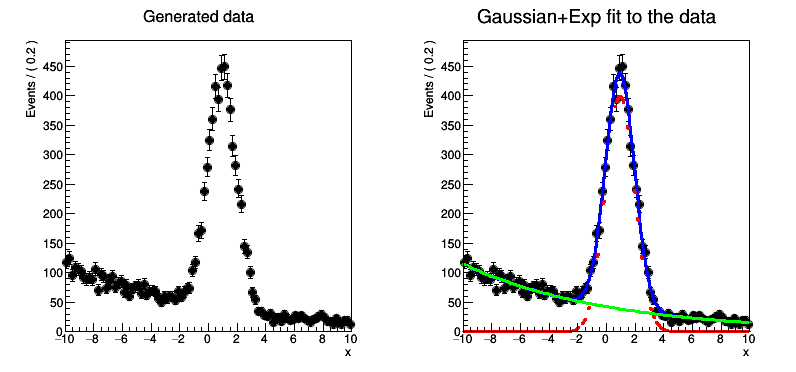

In [10]:
c.cd(2) ; r.gPad.SetLeftMargin(0.15) ; xframe2.GetYaxis().SetTitleOffset(1.6) ; xframe2.Draw() ;                
c.Draw()